In [25]:
using Pkg
pkg_folder = "../"
Pkg.activate(pkg_folder)

import Markdown; Base.showable(::MIME"text/markdown", ::Markdown.MD) = false # to make sth like """?replace"""  works for vscode backend, remember to choose Jupyter kernel
include(pkg_folder*"src/initialize.jl")

@show Threads.nthreads() # check number of threads

Threads.nthreads() = 1

  Activating project at `~/Documents/GitHub/Bnc_julia`


1

In [26]:
q_sym = [:qA, :qB, :qC, :qD, :qE]
K_sym = [:Kab, :Kac, :Kad, :Kae, :Kbc, :Kbd, :Kbe, :Kcd, :Kce, :Kde]
x_sym = [:A, :B, :C, :D, :E, :AB, :AC, :AD, :AE, :BC, :BD, :BE, :CD, :CE, :DE]

N = [1 1 0 0 0 -1 0 0 0 0 0 0 0 0 0;
     1 0 1 0 0 0 -1 0 0 0 0 0 0 0 0;
     1 0 0 1 0 0 0 -1 0 0 0 0 0 0 0;
     1 0 0 0 1 0 0 0 -1 0 0 0 0 0 0;
     0 1 1 0 0 0 0 0 0 -1 0 0 0 0 0;
     0 1 0 1 0 0 0 0 0 0 -1 0 0 0 0;
     0 1 0 0 1 0 0 0 0 0 0 -1 0 0 0;
     0 0 1 1 0 0 0 0 0 0 0 0 -1 0 0;
     0 0 1 0 1 0 0 0 0 0 0 0 0 -1 0;
     0 0 0 1 1 0 0 0 0 0 0 0 0 0 -1]

model = Bnc(N=N, x_sym=x_sym, q_sym=q_sym, K_sym=K_sym)

find_all_vertices!(model)
summary(model)
show_conservation(model)

---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 2451 vertices found and 2451 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.
----------Binding Network Summary:-------------
Number of species (n): 15
Number of conserved quantities (d): 5
Number of reactions (r): 10
L matrix: [1 0 0 0 0 1 1 1 1 0 0 0 0 0 0; 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0; 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0; 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1; 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1]
N matrix: [1 1 0 0 0 -1 0 0 0 0 0 0 0 0 0; 1 0 1 0 0 0 -1 0 0 0 0 0 0 0 0; 1 0 0 1 0 0 0 -1 0 0 0 0 0 0 0; 1 0 0 0 1 0 0 0 -1 0 0 0 0 0 0; 0 1 1 0 0 0 0 0 0 -1 0 0 0 0 0; 0 1 0 1 0 0 0 0 0 0 -1 0 0 0 0; 0 1 0 0 1 0 0 0 0 0 0 -1 0 0 0; 0 0 1 1 0 0 0 0 0 0 0 0 -1 0 0; 0 0 1 0 1 0 0 0 0 0 0 0 0 -1 0; 0 0 0 1 1 0

5-element Vector{Equation}:
 qA ~ A + AB + AC + AD + AE
 qB ~ AB + B + BC + BD + BE
 qC ~ AC + BC + C + CD + CE
 qD ~ AD + BD + CD + D + DE
 qE ~ AE + BE + CE + DE + E

----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.

-------Start calculating vertices neighbor graph with qK change dir, It may takes a while.------------
Done.



┌ Info: Number of polyhedra to calc volume: 1296
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/volume_calc.jl:17
┌ Info: Reached time limit (49.02 s). Stopping.
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/volume_calc.jl:51
┌ Info: Total samples: 300000, Elapsed: 49.02 s
└ @ Main /Users/wuxiaoyu/Documents/GitHub/Bnc_julia/src/volume_calc.jl:121


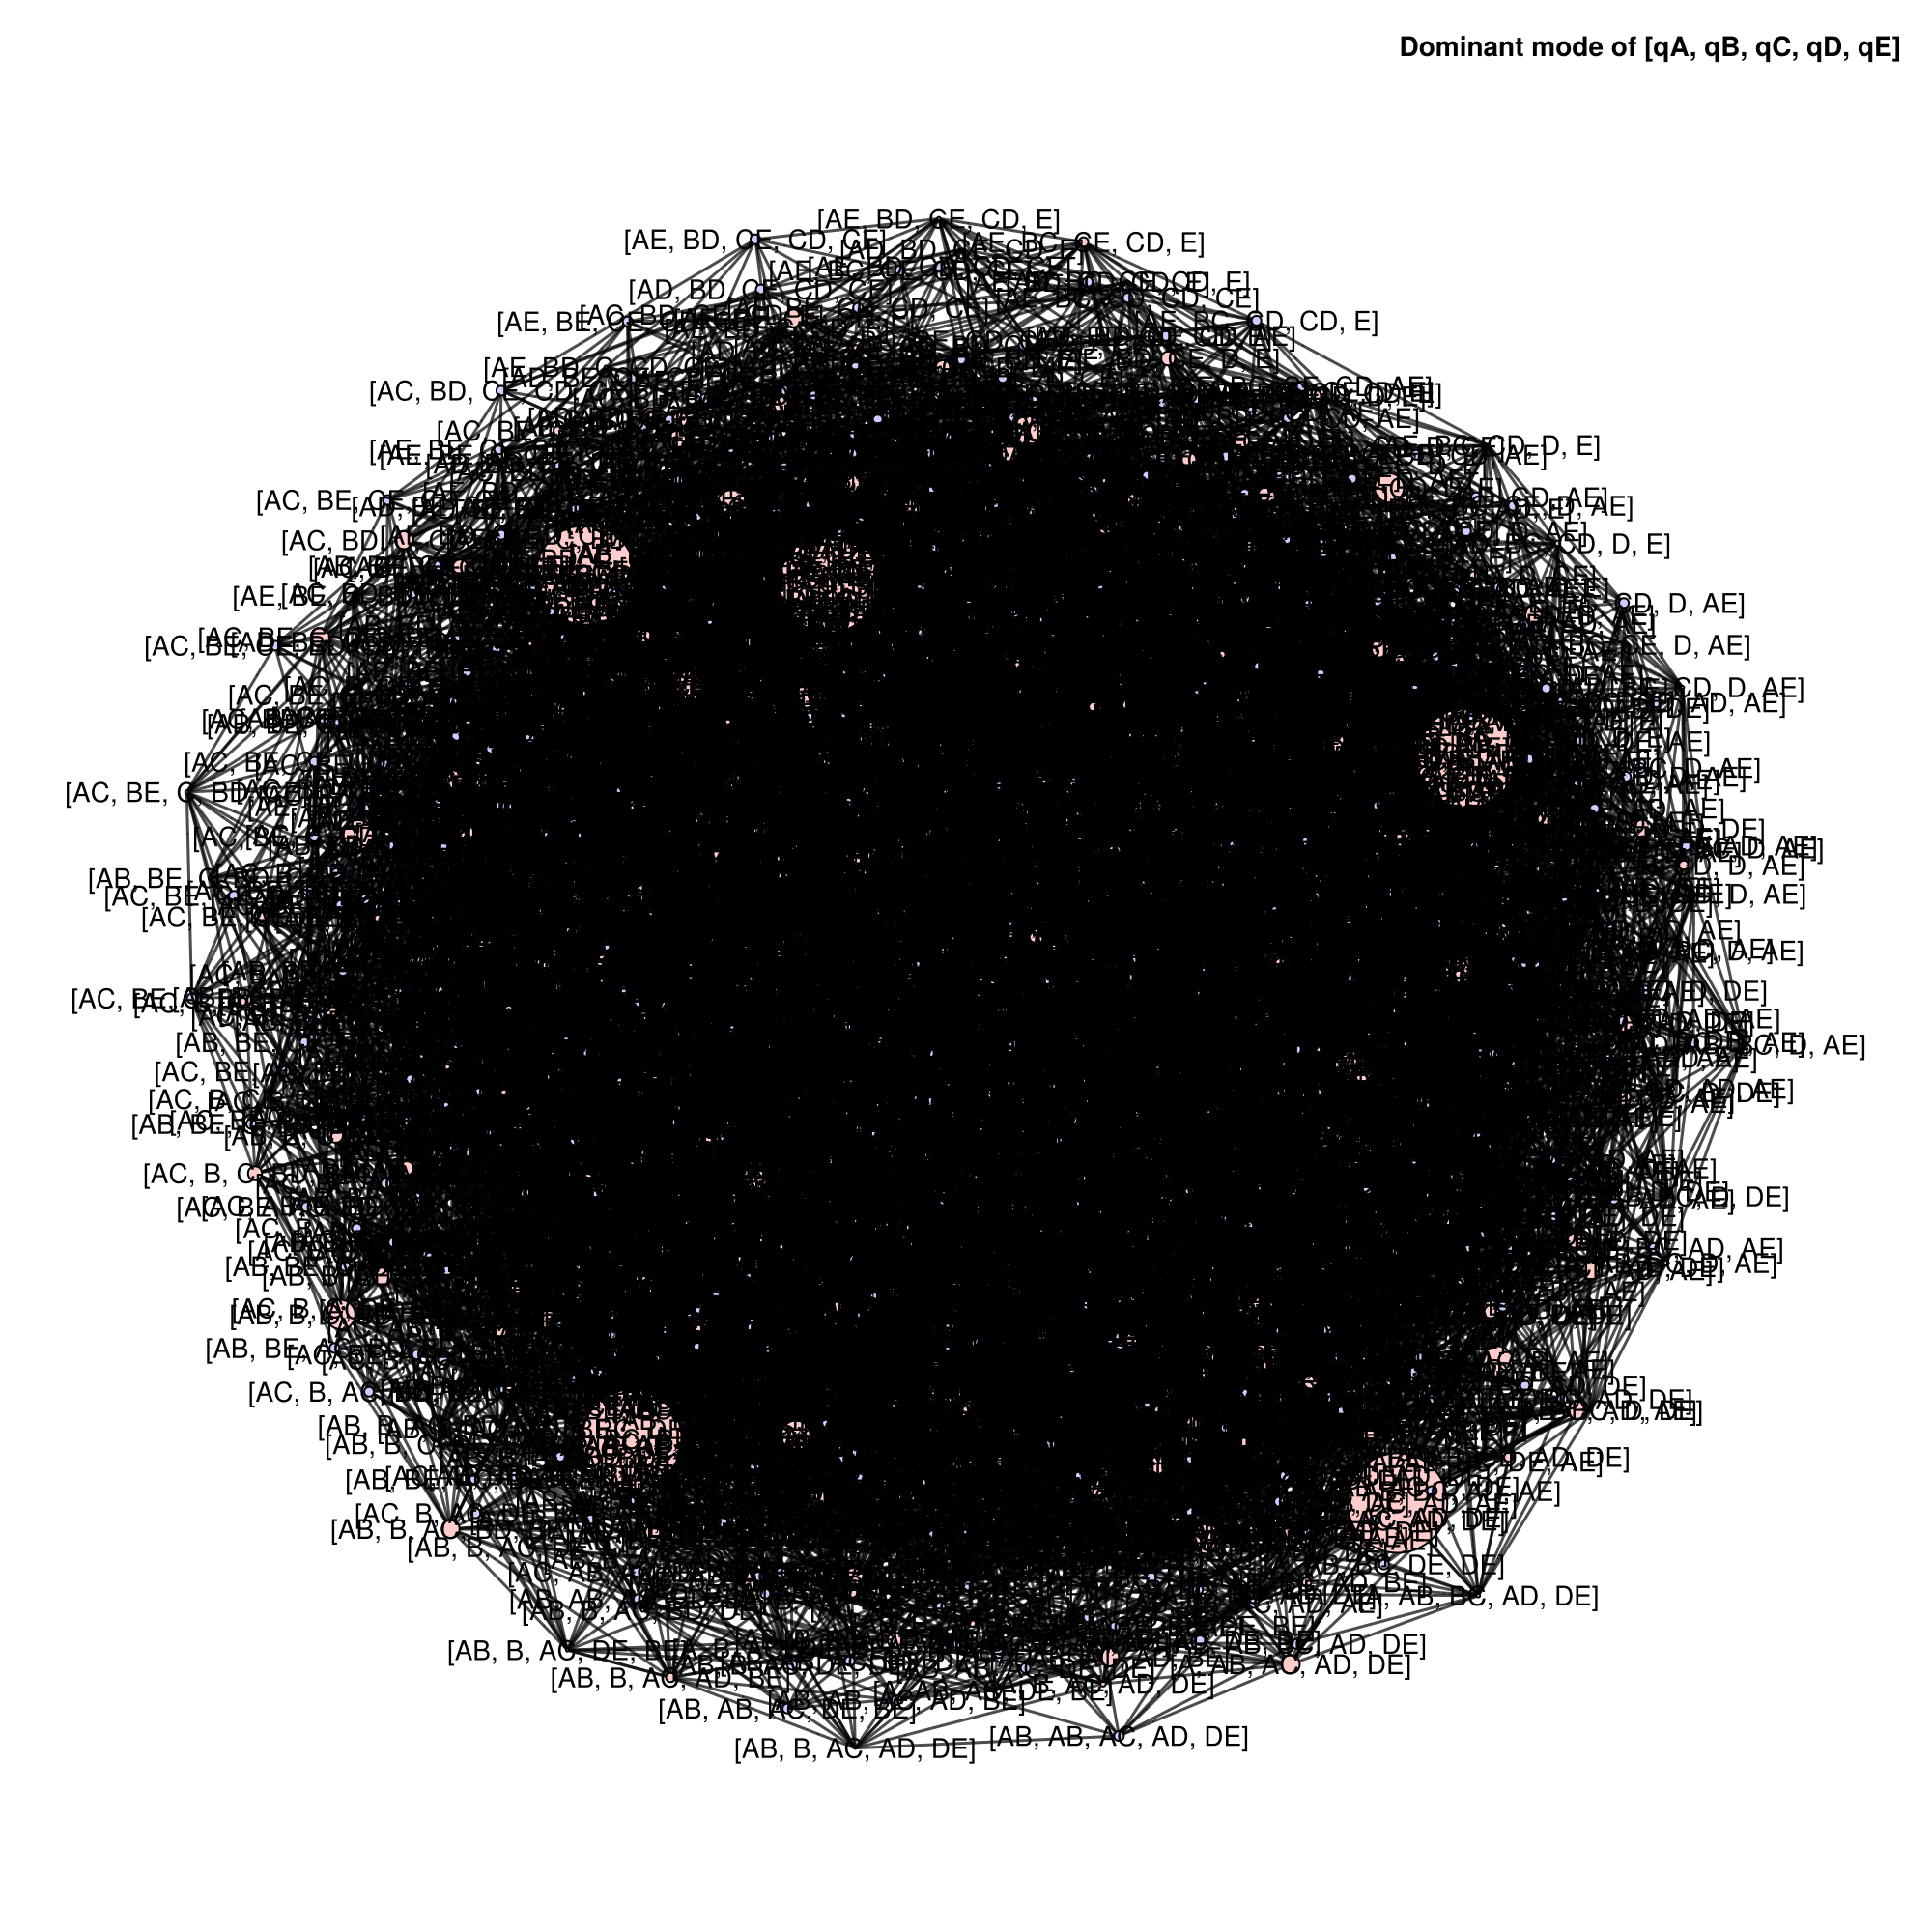

CairoMakie.Screen{IMAGE}


In [27]:
f,ax,p = draw_vertices_neighbor_graph(model; default_node_size=5, edge_labels=" ", ilabel_size=0.01, elabel_size=1)
# add_vertices_idx!(ax, p)
display(f)

In [ ]:
grh = SISO_graph(model, :qA)
summary_path(grh, :CD) |> render_path

┌ Info: sources: [1144, 2261, 1703, 1028, 1438, 1812, 1437, 525, 2232, 1704, 694, 1050, 2188, 844, 358, 1058, 1814, 1102, 79, 1905, 2030, 2074, 1570, 1117, 528, 535, 1896, 839, 250, 2086, 1526, 1939, 1052, 2413, 1245, 828, 1138, 1848, 1155, 1111, 595, 1251, 325, 1621, 444, 2044, 351, 1808, 1236, 1070, 2279, 1580, 1004, 1255, 1336, 18, 1836, 2439, 2241, 987, 1578, 2000, 61, 841, 876, 900, 1585, 1719, 1528, 1325, 1019, 1354, 1519, 80, 51, 2058, 667, 2190, 2029, 2418, 1120, 1908, 2281, 2182, 650, 1395, 2406, 90, 1811, 1941, 2357, 1116, 658, 599, 1714, 487, 406, 643, 2263, 836, 261, 2301, 2043, 1506, 1582, 340, 1535, 1872, 1246, 1152, 1409, 1560, 1996, 645, 649, 1141, 988, 1009, 2090, 14, 1854, 1538, 2257, 2313, 1723, 592, 2265, 597, 879, 1063, 1235, 408, 324, 1151, 698, 2371, 54, 1479, 483, 1576, 961, 903, 1256, 1993, 1998, 1909, 1937, 693, 2042, 1384, 1562, 632, 902, 1607, 373, 53, 2081, 2062, 2233, 1529, 1797, 594, 642, 1041, 1813, 826, 1595, 1442, 1123, 665, 940, 479, 1850, 2076, 1434,

In [ ]:
f, ax, p = draw_vertices_neighbor_graph(grh)
add_vertices_idx!(ax, p)
display(f)